In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [5]:
TITLE = 'ad'

RESULTS_PATH = '..\\results\\working_results\\mT5'
#RESULTS_PATH = '..\\results\\20240511'

MODEL = ''
#MODEL = '_T5' 

In [6]:
df_small = pd.read_csv(f'{RESULTS_PATH}\\{TITLE}\\results_{TITLE}_small{MODEL}.csv')
df_base = pd.read_csv(f'{RESULTS_PATH}\\{TITLE}\\results_{TITLE}_base{MODEL}.csv')
df_large = pd.read_csv(f'{RESULTS_PATH}\\{TITLE}\\results_{TITLE}_large{MODEL}.csv')

In [7]:
df_small = df_small[['Sequence id', 'Levenshtein distance (avg)']]
df_small = df_small.rename(columns={'Levenshtein distance (avg)': 'lev_small'})

df_base = df_base[['Levenshtein distance (avg)']]
df_base = df_base.rename(columns={'Levenshtein distance (avg)': 'lev_base'})

df_large = df_large[['Levenshtein distance (avg)']]
df_large = df_large.rename(columns={'Levenshtein distance (avg)': 'lev_large'})

# Concat df's
df = pd.concat([df_small, df_base, df_large], axis=1)

In [8]:
# # Read the CSV file
# df = pd.read_csv("results_volkskrant_merged.csv", delimiter=';')
# df.head()

In [9]:
df

,Sequence id,lev_small,lev_base,lev_large
0,seq0-0,0.78,1.00,0.80
1,seq1-0,0.80,0.60,1.00
2,seq2-0,1.00,0.75,0.75
3,seq3-0,0.77,0.62,0.85
4,seq4-0,0.62,0.00,0.00
...,...,...,...,...
560,seq560-0,1.00,0.88,0.85
561,seq561-0,0.77,0.86,0.58
562,seq562-0,0.77,0.77,0.36
563,seq563-0,0.71,0.00,0.36


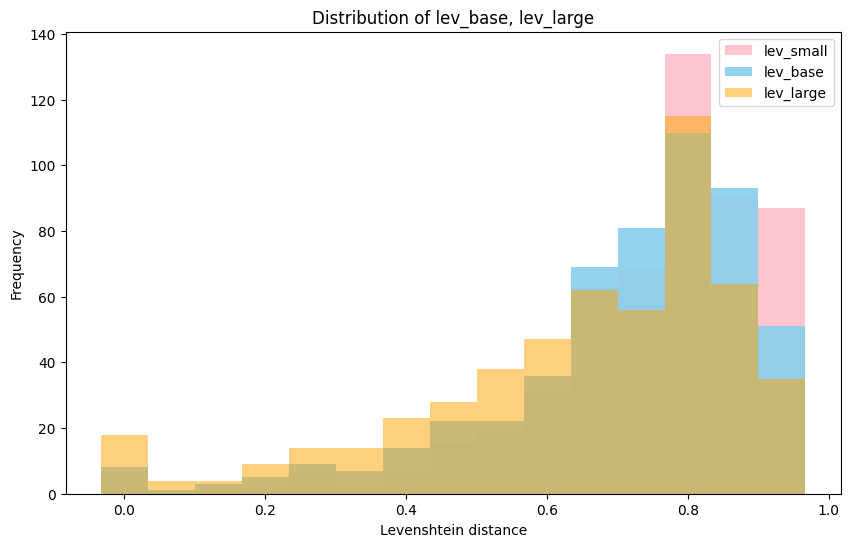

In [10]:
# Extract data
lev_small = df['lev_small']
lev_base = df['lev_base']
lev_large = df['lev_large']
#lev_xl = df['lev_xl']
#lev_xxl = df['lev_xxl']

# Calculate the bin edges manually
bins = 10
bin_edges = 15

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram for lev_small
ax.hist(lev_small, bins=bin_edges, color='pink', alpha=0.9, label='lev_small', align='left')
# Plot histogram for lev_base
ax.hist(lev_base, bins=bin_edges, color='skyblue', alpha=0.9, label='lev_base', align='left')
# Plot histogram for lev_large
ax.hist(lev_large, bins=bin_edges, color='orange', alpha=0.5, label='lev_large', align='left')

# Set labels and title
ax.set_xlabel('Levenshtein distance')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of lev_base, lev_large')

# Add legend
ax.legend()

# Show plot
plt.show()

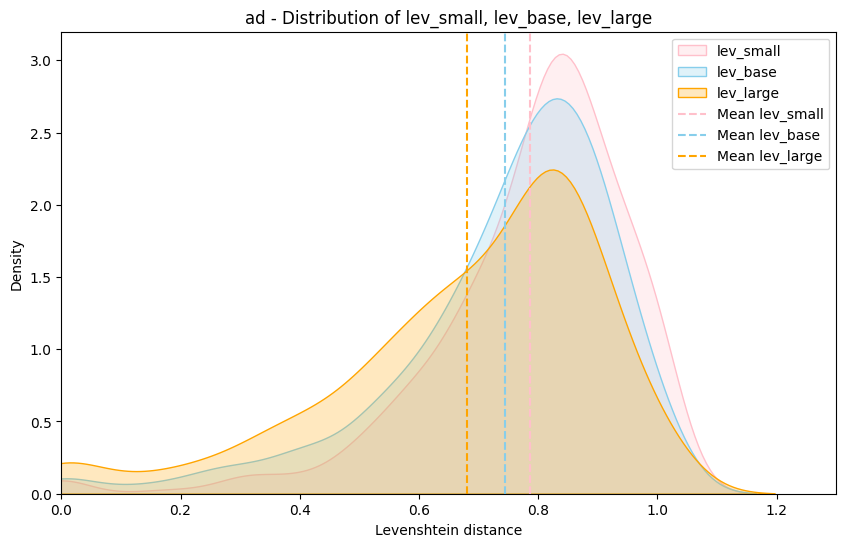

In [11]:
# Create a figure and axis objects
plt.figure(figsize=(10, 6))

# Plot KDE plot for lev_small
sns.kdeplot(df['lev_small'], color='pink', label='lev_small', fill=True)

# Plot KDE plot for lev_base
sns.kdeplot(df['lev_base'], color='skyblue', label='lev_base', fill=True)

# Plot KDE plot for lev_large
sns.kdeplot(df['lev_large'], color='orange', label='lev_large', fill=True)

# Calculate mean distances
mean_lev_small = lev_small.mean()
mean_lev_base = lev_base.mean()
mean_lev_large = lev_large.mean()
# mean_lev_xl = lev_xl.mean()
# mean_lev_xxl = lev_xxl.mean()

# Plot vertical lines for mean distances
plt.axvline(x=mean_lev_small, color='pink', linestyle='--', label='Mean lev_small')
plt.axvline(x=mean_lev_base, color='skyblue', linestyle='--', label='Mean lev_base')
plt.axvline(x=mean_lev_large, color='orange', linestyle='--', label='Mean lev_large')
# plt.axvline(x=mean_lev_xl, color='green', linestyle='--', label='Mean lev_xl')
# plt.axvline(x=mean_lev_xxl, color='purple', linestyle='--', label='Mean lev_xxl')

# # Calculate median distances
# median_lev_base = lev_base.median()
# median_lev_large = lev_large.median()
# median_lev_xl = lev_xl.median()

# # Plot vertical lines for median distances
# plt.axvline(x=median_lev_base, color='skyblue', linestyle='--', label='Median lev_base')
# plt.axvline(x=median_lev_large, color='orange', linestyle='--', label='Median lev_large')
# plt.axvline(x=median_lev_xl, color='green', linestyle='--', label='Median lev_xl')

# Set labels and title
plt.xlabel('Levenshtein distance')
plt.ylabel('Density')
plt.title(f'{TITLE} - Distribution of lev_small, lev_base, lev_large')

# Set x-axis limit to start at 0
plt.xlim(0, 1.3)

# Add legend
plt.legend(loc='upper right')

# Show plot
plt.show()

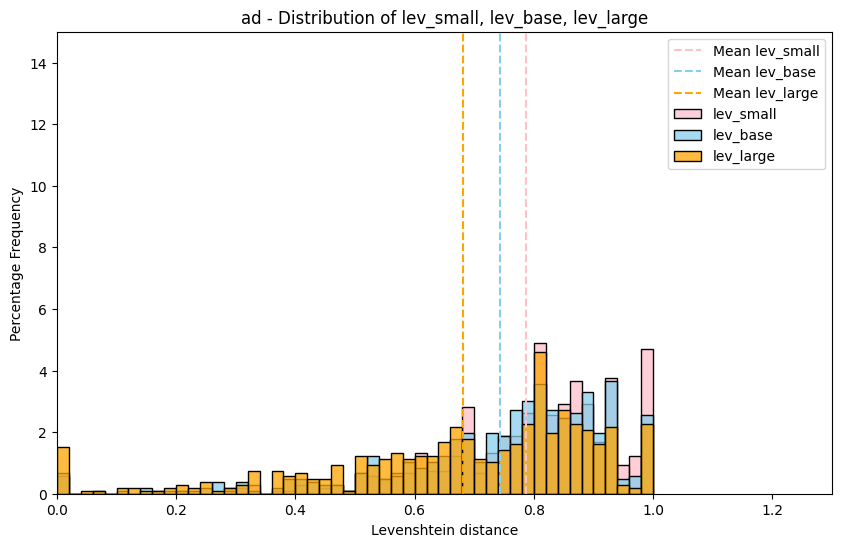

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis objects
plt.figure(figsize=(10, 6))

# Plot histogram for lev_small
sns.histplot(df['lev_small'], color='pink', label='lev_small', bins=50, stat='density', kde=False)

# Plot histogram for lev_base
sns.histplot(df['lev_base'], color='skyblue', label='lev_base', bins=50, stat='density', kde=False)

# # Plot histogram for lev_large
sns.histplot(df['lev_large'], color='orange', label='lev_large', bins=50, stat='density', kde=False)

# # Plot histogram for lev_xl
# sns.histplot(df['lev_xl'], color='green', label='lev_xl', bins=30, stat='density', kde=False)

# # Plot histogram for lev_xxl
# sns.histplot(df['lev_xxl'], color='purple', label='lev_xxl', bins=30, stat='density', kde=False)

# Calculate mean distances
mean_lev_small = df['lev_small'].mean()
mean_lev_base = df['lev_base'].mean()
mean_lev_large = df['lev_large'].mean()
# mean_lev_xl = df['lev_xl'].mean()
# mean_lev_xxl = df['lev_xxl'].mean()

# Plot vertical lines for mean distances
plt.axvline(x=mean_lev_small, color='pink', linestyle='--', label='Mean lev_small')
plt.axvline(x=mean_lev_base, color='skyblue', linestyle='--', label='Mean lev_base')
plt.axvline(x=mean_lev_large, color='orange', linestyle='--', label='Mean lev_large')
# plt.axvline(x=mean_lev_xl, color='green', linestyle='--', label='Mean lev_xl')
# plt.axvline(x=mean_lev_xxl, color='purple', linestyle='--', label='Mean lev_xxl')

# Set labels and title
plt.xlabel('Levenshtein distance')
plt.ylabel('Percentage Frequency')
plt.title(f'{TITLE} - Distribution of lev_small, lev_base, lev_large')

# Set x-axis limit to start at 0
plt.xlim(0, 1.3)
plt.ylim(0, 15)

# Add legend
plt.legend(loc='upper right')

# Show plot
plt.show()



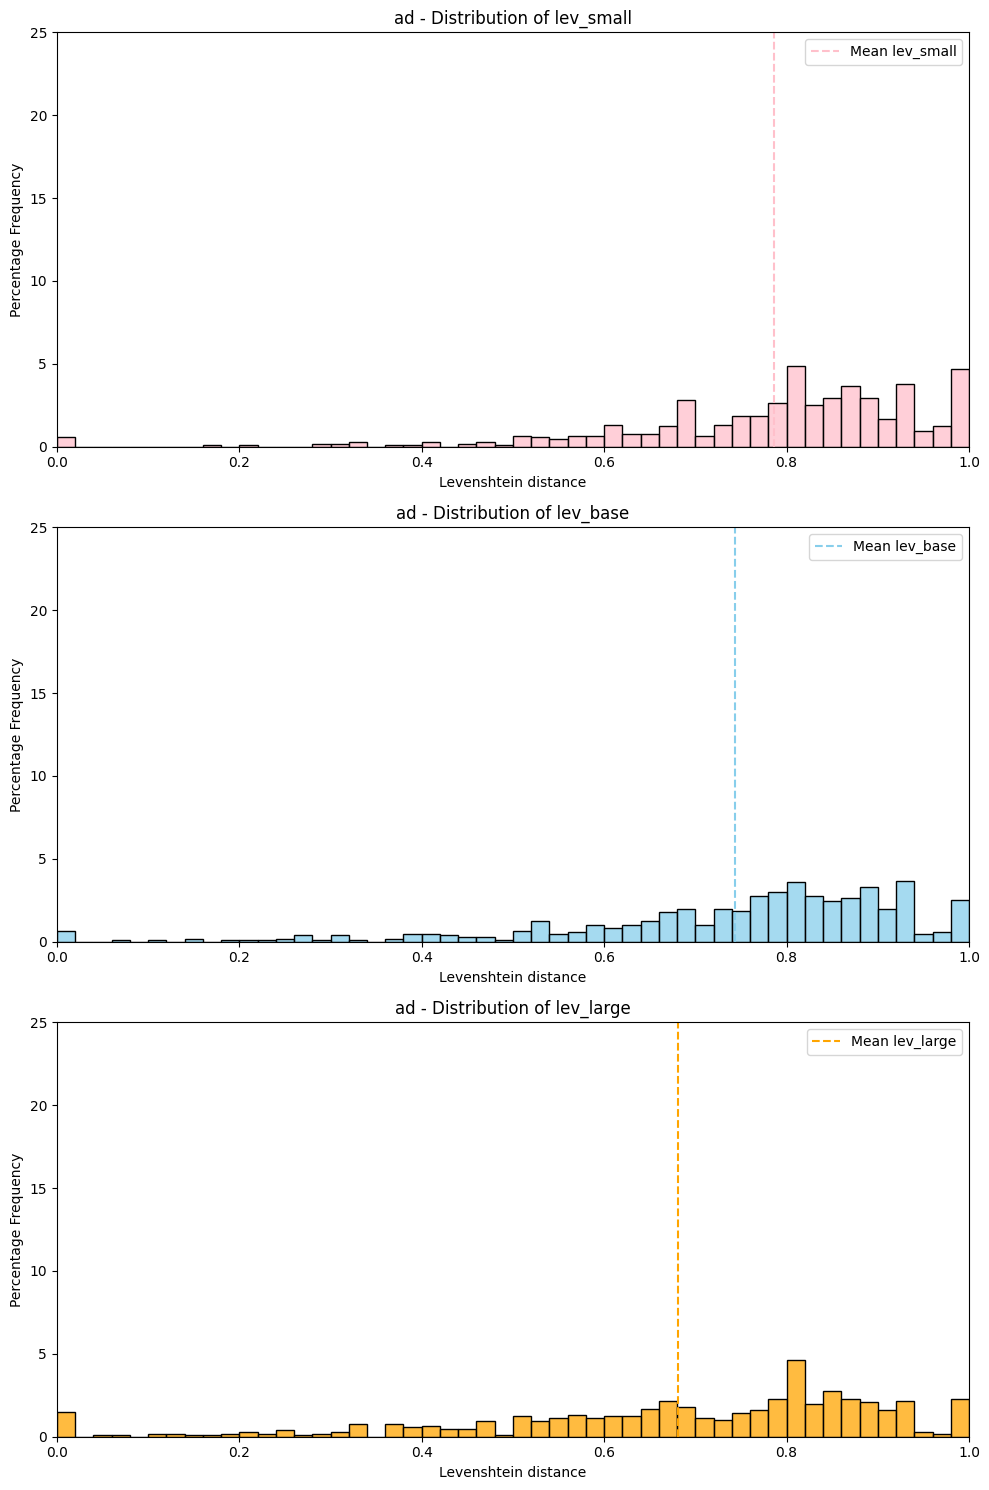

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define number of bins and y-axis limit
bins = 50
y_lim = 25

# Create a figure and axis objects
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot histogram for lev_small
sns.histplot(df['lev_small'], color='pink', bins=bins, stat='density', kde=False, ax=axes[0])
axes[0].axvline(x=df['lev_small'].mean(), color='pink', linestyle='--', label='Mean lev_small')
axes[0].set_xlabel('Levenshtein distance')
axes[0].set_ylabel('Percentage Frequency')
axes[0].set_title(f'{TITLE} - Distribution of lev_small')
axes[0].legend()
axes[0].set_ylim(0, y_lim)
axes[0].set_xlim(0, 1)

# Plot histogram for lev_base
sns.histplot(df['lev_base'], color='skyblue', bins=bins, stat='density', kde=False, ax=axes[1])
axes[1].axvline(x=df['lev_base'].mean(), color='skyblue', linestyle='--', label='Mean lev_base')
axes[1].set_xlabel('Levenshtein distance')
axes[1].set_ylabel('Percentage Frequency')
axes[1].set_title(f'{TITLE} - Distribution of lev_base')
axes[1].legend()
axes[1].set_ylim(0, y_lim)
axes[1].set_xlim(0, 1)

# Plot histogram for lev_large
sns.histplot(df['lev_large'], color='orange', bins=bins, stat='density', kde=False, ax=axes[2])
axes[2].axvline(x=df['lev_large'].mean(), color='orange', linestyle='--', label='Mean lev_large')
axes[2].set_xlabel('Levenshtein distance')
axes[2].set_ylabel('Percentage Frequency')
axes[2].set_title(f'{TITLE} - Distribution of lev_large')
axes[2].legend()
axes[2].set_ylim(0, y_lim)
axes[2].set_xlim(0, 1)

# # Plot histogram for lev_xl
# sns.histplot(df['lev_xl'], color='green', bins=bins, stat='density', kde=False, ax=axes[3])
# axes[3].axvline(x=df['lev_xl'].mean(), color='green', linestyle='--', label='Mean lev_xl')
# axes[3].set_xlabel('Levenshtein distance')
# axes[3].set_ylabel('Percentage Frequency')
# axes[3].set_title('Distribution of lev_xl')
# axes[3].legend()
# axes[3].set_ylim(0, y_lim)
# axes[3].set_xlim(0, 1)

# # Plot histogram for lev_xxl
# sns.histplot(df['lev_xxl'], color='purple', bins=bins, stat='density', kde=False, ax=axes[4])
# axes[4].axvline(x=df['lev_xxl'].mean(), color='purple', linestyle='--', label='Mean lev_xxl')
# axes[4].set_xlabel('Levenshtein distance')
# axes[4].set_ylabel('Percentage Frequency')
# axes[4].set_title('Distribution of lev_xxl')
# axes[4].legend()
# axes[4].set_ylim(0, y_lim)
# axes[4].set_xlim(0, 1)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


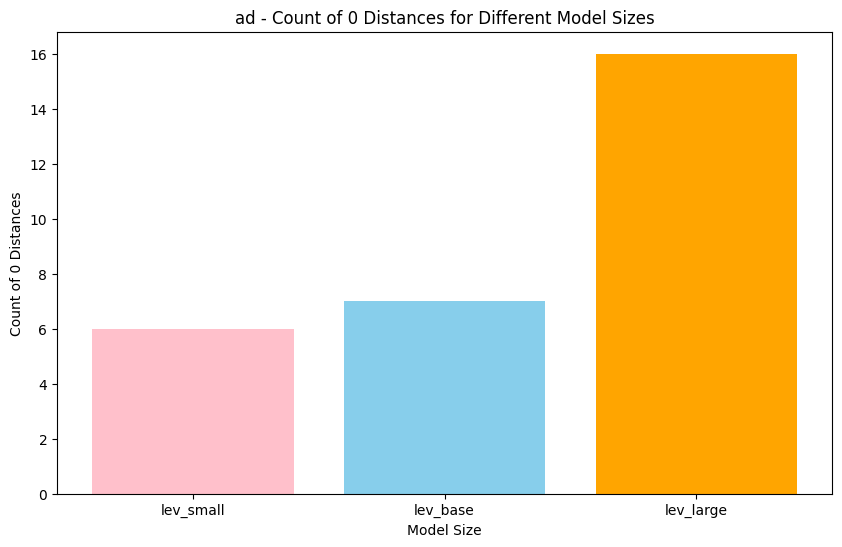

In [14]:
import matplotlib.pyplot as plt

# Count occurrences of 0 distances for each model size
zero_counts = [
    (df['lev_small'] == 0).sum(),
    (df['lev_base'] == 0).sum(),
    (df['lev_large'] == 0).sum()
    # (df['lev_xl'] == 0).sum(),
    # (df['lev_xxl'] == 0).sum()
]

# Define model sizes
model_sizes = ['lev_small', 'lev_base', 'lev_large'] # 'lev_xl', 'lev_xxl']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_sizes, zero_counts, color=['pink', 'skyblue', 'orange']) #'green', 'purple'])
plt.xlabel('Model Size')
plt.ylabel('Count of 0 Distances')
plt.title(f'{TITLE} - Count of 0 Distances for Different Model Sizes')
plt.show()


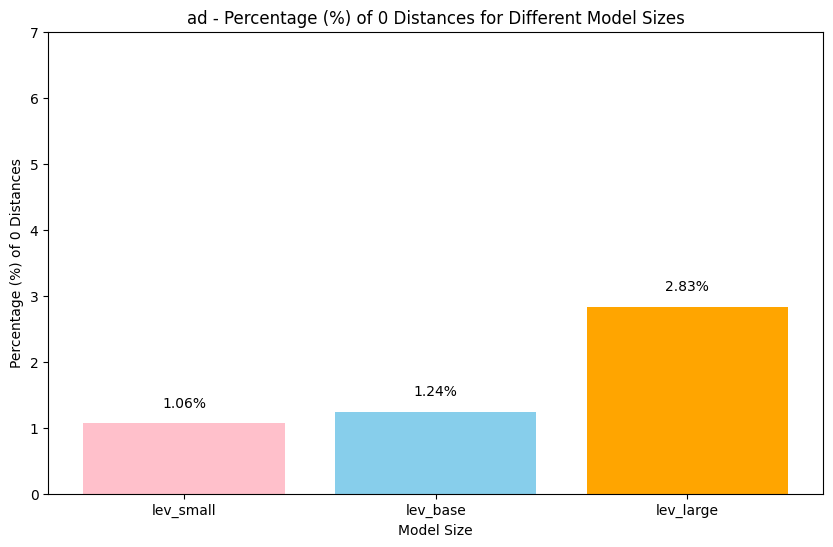

In [15]:
import matplotlib.pyplot as plt

# Calculate total number of samples
total_samples = len(df)

# Calculate percentages of 0 distances for each model size
zero_percentages = [
    ((df['lev_small'] == 0).sum() / total_samples) * 100,
    ((df['lev_base'] == 0).sum() / total_samples) * 100,
    ((df['lev_large'] == 0).sum() / total_samples) * 100
    # ((df['lev_xl'] == 0).sum() / total_samples) * 100
    # ((df['lev_xxl'] == 0).sum() / total_samples) * 100
]

# Define model sizes
model_sizes = ['lev_small', 'lev_base', 'lev_large'] #'lev_xl']# , 'lev_xxl']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_sizes, zero_percentages, color=['pink', 'skyblue', 'orange']) # ,'purple']) #, 'purple'])

plt.xlabel('Model Size')
plt.ylabel('Percentage (%) of 0 Distances')
plt.title(f'{TITLE} - Percentage (%) of 0 Distances for Different Model Sizes')
plt.ylim(0, 7)  # Set y-axis limit to 0-100%

# Add percentages on top of bars
for bar, percentage in zip(bars, zero_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.2, 
             f'{percentage:.2f}%', 
             ha='center', 
             va='bottom')

plt.show()